1. Why must the Lorenz Curve run through (0,0) and (1,1) <br/>
These points are nessesary because naturally zero percent of the population owns zero percent of the wealth, and 100 percent of the population owns 100 percent of the wealth. 

2. Does it ever make sense for a Lorenz curve to decrease?  Why or why not? <br/>
Because wealth of the population is cumulative, it would not make sense for the Lorenze curve to decrease, unless we accounted for the existance of negative wealth. The weath of a previous percent of the population is added onto the wealth of the next percent, and so is exclusively increasing. 

3. Use Desmos to graph the function $$f(x) = 2.8x^{3}-3x^{2}+1.2x$$ Even though this function passes through (0,0) and (1,1), it does not make sense as a Lorenz curve.  Explain why not. <br/>
This function does not make sense as a Lorenz curve because it flattens out and then raises. The slope of the Lorenz curve should remain constant and be strictly increasing. 
4. How can you express the constraints on the Lorenz curve in numerical, functional, and/or programmatic form?  [You’ll need to be able to do this in order to make sure your program can check it.] <br/>
We can set the values in the Lorenz Curve up against an inequality that is the line of perfect equality. In psudo-code in a given loop, this would look like: 

```
def slope(x1,y1,x2,y2):
  s = (y2-y1)/(x2-x1)
  return s

current_slope = slope(gini_x, gini_y, future_gini_x,future_gini_y)

if previous slope > current_slope:
  return false

previous_slope = current_slope

```



In [1]:
#@title Run this code to import libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

In [ ]:
def funct(x):
  fx = 1.25968*x**5 + -1.07844*x**4 + .756024*x**3 + .0629885*x**2

  # fx = x
  return fx

def area(x):
  a = x*.000001
  return a

ilist = np.arange(0, 1, .000001)

print(ilist)

print(len(ilist))
gini = 0

for i in ilist:
  pa = area(funct(i))
  gini += pa

a = .5-gini
b = gini

print('a:', a)


print('First quintile:', funct(.2))
print('Second quintile:', funct(.4)-funct(.2), 'Cumulative:', funct(.4))
print('Third quintile:', funct(.6)-funct(.4), 'Cumulative:', funct(.6))
print('Fourth quintile:', funct(.8)-funct(.6), 'Cumulative:', funct(.8))
print('Fifth quintile:', funct(1)-funct(.8), 'Cumulative:', funct(1))

print('Gini Index:', a/(a+b)*100)

[0.00000e+00 1.00000e-06 2.00000e-06 ... 9.99997e-01 9.99998e-01
 9.99999e-01]
1000000
a: 0.29573966679255403
First quintile: 0.007245325600000002
Second quintile: 0.03650942960000001 Cumulative: 0.043754755200000016
Third quintile: 0.10040918159999992 Cumulative: 0.14416393679999995
Fourth quintile: 0.2542759096000002 Cumulative: 0.39843984640000013
Fifth quintile: 0.6018126535999997 Cumulative: 1.0002524999999998
Gini Index: 59.147933358510805


#Portfolio Project

Exclusively with Quintiles

In [5]:
#exclusively quintile data

# Quintiles: 5.5, 9.7, 13.8, 20.4, 50.6

#Right hand rectangles
def area(x):
  a = x*.2
  return a

def slope(x1,y1,x2,y2):
  s = (y2-y1)/(x2-x1)
  return s


quint_list_right = [5.5, 15.2, 29, 49.4, 100]
gini = 0

previous_slope = 0
for i in quint_list_right:

  current_slope = slope(0,0,.2,.055)

  if previous_slope > current_slope:
    print("Wrong")

  pa = area(i/100)
  gini += pa
  previous_slope = current_slope

a = .5-gini
b = gini

print("Right Handed")
print('Area under curve:', b)
print('Gini Index:', a/(a+b)*100)

#Left hand rectangles
quint_list_left = [0, 5.5, 15.2, 29, 49.4]
gini = 0

previous_slope = 0

for i in quint_list_left:
  current_slope = slope(0,0,.2,.055)

  if previous_slope > current_slope:
    print("Wrong")

  pa = area(i/100)
  gini += pa
  previous_slope = current_slope

a = .5-gini
b = gini
print("Left Handed")
print("Area Under Curve:", b)
print('Gini Index:', a/(a+b)*100)


Right Handed
Area under curve: 0.3982
Gini Index: 20.36
Left Handed
Area Under Curve: 0.1982
Gini Index: 60.36


Interpolating Values

In [29]:
def slope(x1,y1,x2,y2):

  s = (y2-y1)/(x2-x1+.00000000000001)
  return s

def midpoint(y1,y2):
  mp = (y1+y2)/2
  return mp
  
def findpoint(x1,y1,x2,y2):
  x = (x2+x1)/2
  y = random.uniform(y1,midpoint(y1,y2))


  p = [x,y]
  return p

def area(step,hight):
  a = hight*step
  return a


point_list = [.055, .152, .29, .494, 1]

real_gini = 43.7

gini = 0
prev_x = 0
prev_y = 0
b = 0

print(point_list)

# for j in range(100):
new_point_list = []
for i in point_list:
    
  b +=1
  found_point = findpoint(prev_x,prev_y,b/len(point_list),i) #in-between point data
  pa = area(.1,found_point[1])
  gini += pa
  new_point_list.append(found_point[1])

  pa = area(.1,i) # quintile area
  gini += pa
  new_point_list.append(i)

  prev_x = b/len(point_list) #setting previous for next round
  prev_y = i

a = .5-gini
b = gini

print("Right Handed")
print('Area under curve:', b)
print('Gini Index:', a/(a+b)*100)

print("New point list:",new_point_list)
gini = 0
prev_x = 0
prev_y = 0
b = 0

new_new_point_list = []
for i in new_point_list:
  b +=1
  found_point = findpoint(prev_x,prev_y,b/len(point_list),i) #in-between point data
  pa = area(.05,found_point[1])
  gini += pa
  new_new_point_list.append(found_point[1])
  

  pa = area(.05,i) # quintile area
  gini += pa
  new_new_point_list.append(i)

  prev_x = b/len(point_list) #setting previous for next round
  prev_y = i

a = .5-gini
b = gini

print("Right Handed")
print('Area under curve:', b)
print('Gini Index:', a/(a+b)*100)

print("New new point list:", new_new_point_list)

[0.055, 0.152, 0.29, 0.494, 1]
Right Handed
Area under curve: 0.32995564974507985
Gini Index: 34.00887005098403
New point list: [0.010438148475757334, 0.055, 0.06730202884909389, 0.152, 0.19732408737641438, 0.29, 0.389015252940181, 0.494, 0.6444769798093515, 1]
Right Handed
Area under curve: 0.2890100447706341
Gini Index: 42.19799104587318
New new point list: [0.004007357067980868, 0.010438148475757334, 0.017927391481993484, 0.055, 0.055682359401987375, 0.06730202884909389, 0.08887595700031992, 0.152, 0.1537635811679312, 0.19732408737641438, 0.2130206467063615, 0.29, 0.3246166837126907, 0.389015252940181, 0.43449197379916976, 0.494, 0.5160064520100801, 0.6444769798093515, 0.6722519956133675, 1]


Final Iter

In [31]:
gini = 0
prev_x = 0
prev_y = 0
b = 0

new_new_new_point_list = []

for i in new_new_point_list:
  b +=1
  found_point = findpoint(prev_x,prev_y,b/len(point_list),i) #in-between point data
  pa = area(.025,found_point[1])
  gini += pa
  new_new_new_point_list.append(found_point[1])
  

  pa = area(.025,i) # quintile area
  gini += pa
  new_new_new_point_list.append(i)

  prev_x = b/len(point_list) #setting previous for next round
  prev_y = i

a = .5-gini
b = gini

print("Right Handed")
print('Area under curve:', b)
print('Gini Index:', a/(a+b)*100)

print("New new point list:", new_new_new_point_list)

Right Handed
Area under curve: 0.2687846797934457
Gini Index: 46.24306404131085
New new point list: [4.6568478510089746e-05, 0.004007357067980868, 0.006921469451312568, 0.010438148475757334, 0.013226119586526313, 0.017927391481993484, 0.028560714351258107, 0.055, 0.05529584113587501, 0.055682359401987375, 0.05911963372620499, 0.06730202884909389, 0.07681851397665043, 0.08887595700031992, 0.10349672543604245, 0.152, 0.152189229111371, 0.1537635811679312, 0.17062655293180318, 0.19732408737641438, 0.2006743197117153, 0.2130206467063615, 0.24186889871129344, 0.29, 0.2916437668696538, 0.3246166837126907, 0.329156417572134, 0.389015252940181, 0.3941538311633993, 0.43449197379916976, 0.44812021941551294, 0.494, 0.4979255774675536, 0.5160064520100801, 0.5669481962387116, 0.6444769798093515, 0.6522268371820872, 0.6722519956133675, 0.6821668638075307, 1]


Graphing the Curve

4.6568478510089746e-05


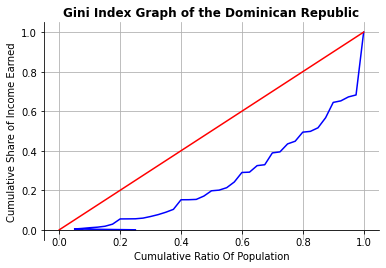

In [40]:
# 100 linearly spaced numbers
x = np.linspace(0,1,100)

# the function, which is y = x^2 here
y1 = 1.7593*x**5 + -1.12069*x**4 + -1.14584*x**3 + 1.50702*x**2

y2 = x
# setting the axes at the center
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')




ax.grid()

plt.title('Gini Index Graph of the Dominican Republic',
          fontweight="bold")

ax.set_xlabel("Cumulative Ratio Of Population")

ax.set_ylabel("Cumulative Share of Income Earned")

# plot the function
# plt.plot(x,y1, 'b')
print(new_new_new_point_list[0])
plt.plot([.25,.05,.075,.1,.125,.15,.175,.2,.225,.25,.275,.3,.325,.35,.375,.4,.425,.45,.475,.5,.525,.55,.575,.6,.625,.65,.675,.7,.725,.75,.775,.8,.825,.85,.875,.9,.925,.95,.975,1],new_new_new_point_list, 'b')
plt.plot(x,y2, 'r') 


# show the plot
plt.show()

The curve is quickly approaching the true gini index of 43.7